# **Predicting heart disease using machine learning**

 #This notebook looks into using various Python-based machine learning and data science libraries in attempt to build a ML model capable of predicting whether or not someone has heart disease based on their medical attributes

# we will follow following approach
#1.problem defination
#2.data
#3.evaluation
#4.Features
#5.Modelling
#6.Experimentation


## 1.Problem defination

# In a statement,>given clinical parameters about a patient,can we predict whether or not they have heart disease?

## 2.Data
#available on kaggle

##3.Evaluation

## >If we can reach 95% accuracy at predicting whether or not a patient has heart disease during proof of concept,we'll pursue the project

##4.Features


##id (Unique id for each patient)
##age (Age of the patient in years)
##sex (Male/Female)
##cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
##trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
##chol (serum cholesterol in mg/dl)
##fbs (if fasting blood sugar > 120 mg/dl)
#restecg (resting electrocardiographic results)
#-- Values: [normal, stt abnormality, lv hypertrophy]
#thalach: maximum heart rate achieved
#exang: exercise-induced angina (True/ False)
#oldpeak: ST depression induced by exercise relative to rest
#slope: the slope of the peak exercise ST segment
#ca: number of major vessels (0-3) colored by fluoroscopy
#thal: [normal; fixed defect; reversible defect]
#num: the predicted attribute

In [2]:
#preparing our tools

#Regular EDA (exploratary data analysis ) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.show()

%matplotlib inline 
## we want our plots to appear inside notebook

#model from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluations
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,precision_score,recall_score,f1_score,RocCurveDisplay

#importing seaborn
import sys
!conda install --yes --prefix {sys.prefix} seaborn
import seaborn as sns

Channels:
 - defaults
Platform: win-64
Solving environment: ...working... done

# All requested packages already installed.



In [3]:
##Load data
df=pd.read_csv("heart-disease (1).csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df.shape

(303, 14)

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [7]:
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
## Heart disease frequency according to gender

In [11]:
#compare target column with sex column
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [12]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


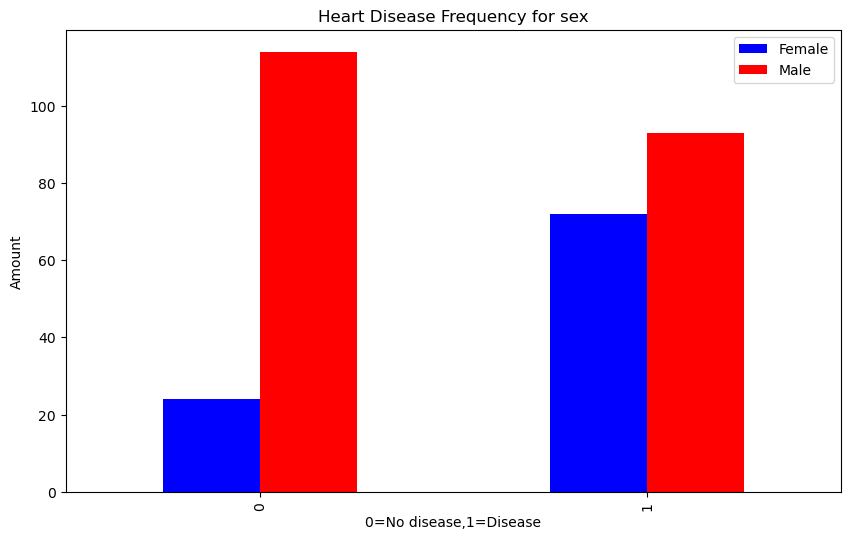

In [13]:
# create a plot of crosstab
pd.crosstab(df.target,df.sex).plot(kind="bar",
                                   figsize=(10,6),
                                   color=["blue","red"])
plt.title("Heart Disease Frequency for sex")
plt.xlabel("0=No disease,1=Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"]);

In [14]:
df["thalach"].value_counts()

thalach
162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: count, Length: 91, dtype: int64

## Age vs Max heart rate for Heart disease

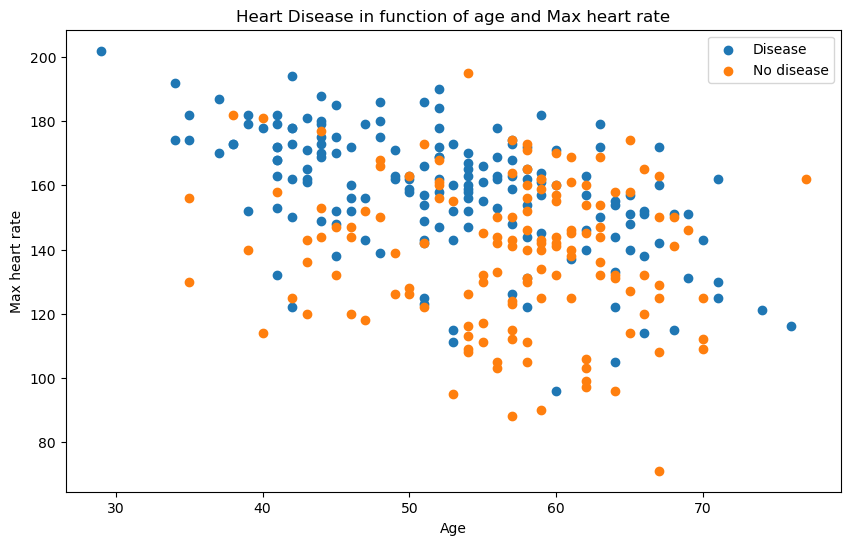

In [15]:
# create another figure
plt.figure(figsize=(10,6))

#scatter with positive examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1])

#scatter with negative examples
plt.scatter(df.age[df.target==0],df.thalach[df.target==0])

#Add some helpful info
plt.title("Heart Disease in function of age and Max heart rate")
plt.xlabel("Age")
plt.ylabel("Max heart rate")
plt.legend(["Disease","No disease"])
plt.show()

In [18]:
#check the distribution of age with histogram
df.age.plot.hist();

In [19]:
df.chol.plot.hist();


### heart disease frequency per chest pain

cp-chest pain type 

    0:typical angina:chest pain related to decreased blood supply to the heart
    
    1:atypical angila:chest pain not related to heart
    
    2:non-angina pain:typically esophageal spasms
    
    3:asymptomatic: chest pain not showing signs of disease

In [20]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


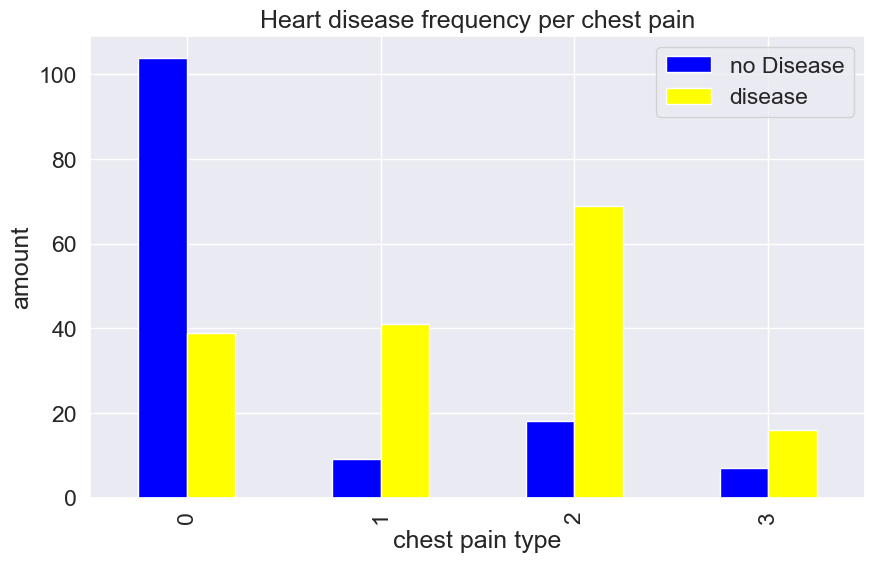

In [136]:
# Make the crosstab more visual
pd.crosstab(df.cp,df.target).plot(kind="bar",
                                  figsize=(10,6),
                                  color=["blue","yellow"])
#adding some communication
plt.title("Heart disease frequency per chest pain")
plt.xlabel("chest pain type")
plt.ylabel("amount")
plt.legend(["no Disease","disease"])
plt.show()

In [22]:
#Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [23]:
# Lets's make our correlation matix a little prettier
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt=".2f",
               cmap="YlGnBu");
               

read about what positive and negative correlation value indicates

## 5.Modelling

In [24]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [25]:
#Split data in x,y
X=df.drop("target",axis=1)
y=df["target"]

In [26]:
np.random.seed()
X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                               test_size=0.2)

We're going to try 3 different machine learning models:

1.Logistic regression

2.K-Nearest neighbors classifier

3.Random Forest classifier

In [141]:
#Put models in a dictionary
models={"Logistic Regression":LogisticRegression(max_iter=1000),
        "KNN":KNeighborsClassifier(),
        "Random Forest":RandomForestClassifier()}

#Create a function to fit and score models

def fit_and_score(models,X_train,X_test,y_train,y_test):
    np.random.seed(42)
    #Make a dictionary to keep model scores
    model_score={}
    #loop through models
    for name,model in models.items():
        #fit the model to data
        model.fit(X_train,y_train)
        #evaluate the model and append its score to model_score
        model_score[name]=model.score(X_test,y_test)
    return model_score
    

In [142]:
model_scores=fit_and_score(models,
                           X_train,
                           X_test,
                           y_train,y_test)
model_scores                           

{'Logistic Regression': 0.8688524590163934,
 'KNN': 0.6721311475409836,
 'Random Forest': 0.8524590163934426}

In [143]:
## Model comparison=o
model_compare=pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar()

<Axes: >

Now we've got got out baseline model..and we know a model's first predictions aren't always what we should base our next steps off.what should we do?

Lets's look at following:
* hyperparameter tuning
* Feature importance
* confusion matrix
* cross-validation
* Precision
* Recall
* F1 score
* ROC curve
* Area under curve


**hyperparameter tuning**

In [144]:
#Let's tune KNN 

train_scores=[]
test_scores=[]

#Create a list of different values for n_neighbors
neighbors= range(1,21)

#setup KNN
knn=KNeighborsClassifier()

#loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    #fit the algo
    knn.fit(X_train,y_train)

    #update the training scores list
    train_scores.append(knn.score(X_train,y_train))

    #update the test scores list
    test_scores.append(knn.score(X_test,y_test))

                        



In [31]:
train_scores


[1.0,
 0.8057851239669421,
 0.7892561983471075,
 0.7727272727272727,
 0.7851239669421488,
 0.7603305785123967,
 0.7355371900826446,
 0.7355371900826446,
 0.7520661157024794,
 0.7272727272727273,
 0.7396694214876033,
 0.7107438016528925,
 0.7231404958677686,
 0.7066115702479339,
 0.6983471074380165,
 0.71900826446281,
 0.7024793388429752,
 0.71900826446281,
 0.7024793388429752,
 0.7148760330578512]

In [32]:
test_scores

[0.6065573770491803,
 0.5737704918032787,
 0.6065573770491803,
 0.5573770491803278,
 0.6721311475409836,
 0.6065573770491803,
 0.6229508196721312,
 0.6229508196721312,
 0.6065573770491803,
 0.6229508196721312,
 0.6557377049180327,
 0.6557377049180327,
 0.639344262295082,
 0.6229508196721312,
 0.6721311475409836,
 0.6229508196721312,
 0.6557377049180327,
 0.6557377049180327,
 0.639344262295082,
 0.6721311475409836]

In [33]:
plt.plot(neighbors,train_scores,label="Train  score")
plt.plot(neighbors,test_scores,label="Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("no. of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

Maximum KNN score on the test data: 67.21%


## hyperparameter tuning with RandomizedSearchCV

we're going to tune:
* LogisticRegression
* RandomForestClassifier
  
 ...using RandomizedSearchCV

In [34]:
#create a hyperparameter grid for LogisticRegression
log_reg_grid={"C":np.logspace(-4,4,20),
              "solver":["liblinear"]}

#create a hyperparameter grid for RFC
rf_grid={"n_estimators":np.arange(10,1010,50),
         "max_depth":[None, 3, 5, 10],
         "min_samples_split":np.arange(2,20,2),
         "min_samples_leaf":np.arange(1,20,2)}

Now we've got hyperparameters grids setup for each of our models,let's tune them using RandomizedSearchCV

In [35]:
#tune LogisticRegression
np.random.seed(42)

#Setup random hyperparamater search for LogisticRegression
rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                              param_distributions=log_reg_grid,
                              cv=5,
                              n_iter=20,
                              verbose=True)
#Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [36]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [37]:
rs_log_reg.score(X_test,y_test)

0.8688524590163934

### *tuning RFC using RandomizedSearchCV*

In [38]:
np.random.seed(42)

rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                              param_distributions=rf_grid,
                              cv=5,
                              n_iter=30,
                              verbose=True)
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=30,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [39]:
rs_rf.best_params_

{'n_estimators': 910,
 'min_samples_split': 18,
 'min_samples_leaf': 1,
 'max_depth': 10}

In [42]:
rs_rf.score(X_test,y_test)

0.8524590163934426

## Hyperparameter tuning with GridSearchCV
Since our logissticRegressor model provides the best scores so far,we'll try and improve them again using GridSearchCV.....

In [145]:
log_reg_grid={"C":np.logspace(-4,4,30),
              "solver":["liblinear"]}
np.random.seed(42)

#setup grid hyperparameter search for LogisticRegression
gs_log_reg=GridSearchCV(LogisticRegression(),
                        param_grid=log_reg_grid,
                        cv=5,
                        verbose=True)
gs_log_reg.fit(X_train,y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [146]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [147]:
gs_log_reg.score(X_test,y_test)

0.8688524590163934

### Tuning RandomForestClassifier with GridSearchCV

In [ ]:
ran_for_grid={"n_estimators":np.arange(10,1010,50),
         "max_depth":[None,1,3,5,7,9,11],
         "min_samples_split":np.arange(1,20,2),
         "min_samples_leaf":np.arange(1,20,2)}
gs_rf=GridSearchCV(RandomForestClassifier(),
                              param_grid=ran_for_grid,
                              cv=5,
                              verbose=True)
gs_rf.fit(X_train,y_train)


Fitting 5 folds for each of 14000 candidates, totalling 70000 fits


In [ ]:
gs_rf.best_params_
gs_rf.score(X_test,y_test)





## Evaluating our tuned machine learning classifier,beyond accuracy

##* ROC curve and AUC score
##* confusion matrix
##* classification report
##* precision
##* recall
##*F1-score

##..and it would be great if cross-validation was used where possible



In [50]:
#Make predictions with tuned model
y_preds=gs_log_reg.predict(X_test)

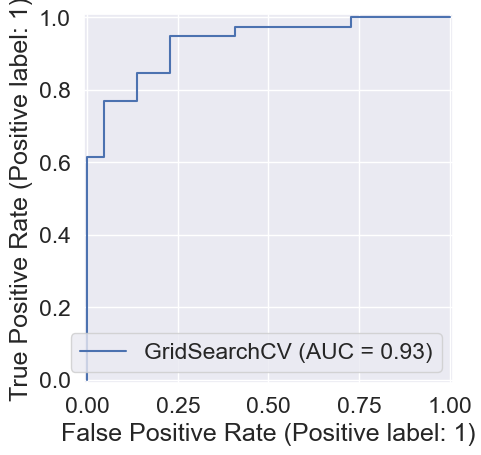

In [125]:
#Plot ROC curve 
ROC_curve=RocCurveDisplay.from_estimator(
   gs_log_reg, X_test, y_test)
plt.show(ROC_curve)

In [54]:
# confusion matrix
print(confusion_matrix(y_test,y_preds))

[[17  5]
 [ 3 36]]


In [58]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                   annot=True,
                   cbar=False)
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")

    

In [68]:
pcm=plot_conf_mat(y_test,y_preds)

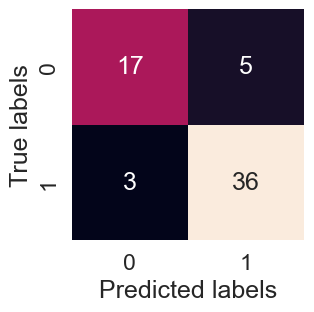

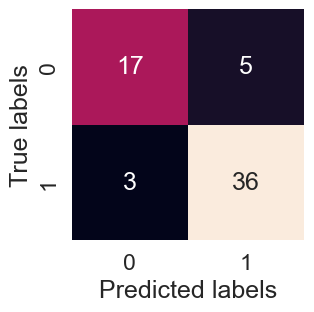

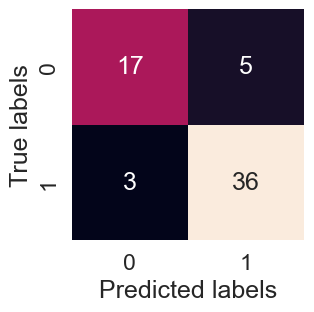

In [69]:
plt.show(pcm)

In [73]:
## classification report


In [74]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81        22
           1       0.88      0.92      0.90        39

    accuracy                           0.87        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.87      0.87      0.87        61



In [75]:
## Calculate evaluation metrics using cross-validation

In [76]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [78]:
#create a new classifier with best parameters

clf=LogisticRegression(C=0.20433597178569418,
                       solver="liblinear")

In [80]:
#cross-validated-accuracy
cv_acc=cross_val_score(clf,
                       X,
                       y,
                      cv=5,
                      scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [95]:
cv_acc=np.mean(cv_acc)
cv_acc

0.8446994535519124

In [96]:
#cross validaated precision
cv_prec=cross_val_score(clf,
                       X,
                       y,
                      cv=5,
                      scoring="precision")
cv_prec

array([0.775     , 0.88571429, 0.85714286, 0.86111111, 0.725     ])

In [97]:
cv_prec=np.mean(cv_prec)
cv_prec

0.8207936507936507

In [ ]:
#cross-validated recall score
cv_recall=cross_val_score(clf,
                       X,
                       y,
                      cv=5,
                      scoring="recall")
cv_recall=cv_recall.mean()
cv_recall

In [99]:
#cross-validated f1-score
cv_f1=cross_val_score(clf,
                       X,
                       y,
                      cv=5,
                      scoring="f1")
cv_f1=cv_f1.mean()
cv_f1

0.8673007976269721

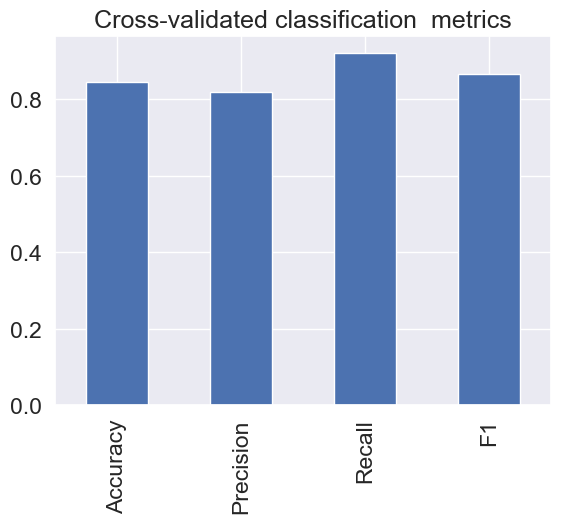

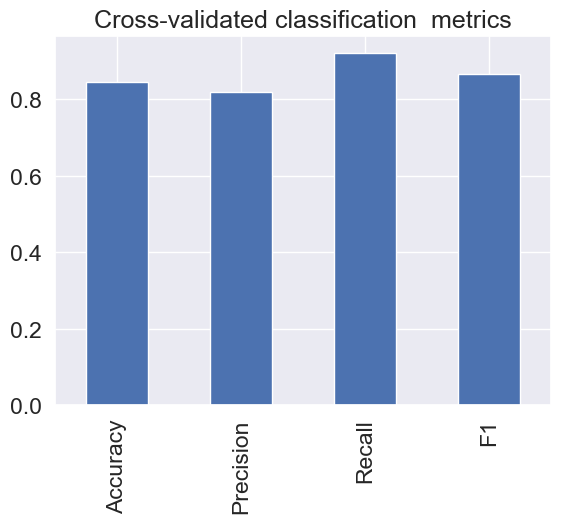

In [101]:
#visualize our cross-validated metrics
cv_metrics=pd.DataFrame({"Accuracy": cv_acc,
                        "Precision":cv_prec,
                        "Recall":cv_recall,
                        "F1":cv_f1},
                       index=[0])

cvcm=cv_metrics.T.plot.bar(title="Cross-validated classification  metrics",
                      legend=False)
plt.show(cvcm)

In [102]:
#Feature importance
## Which features contributed most to outcomes of the model and how?

In [126]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [127]:
#Fit an instance of LogisticRegression
clf=LogisticRegression(C=0.20433597178569418,
                       solver="liblinear")
clf.fit(X_train,y_train);

In [128]:
# check coef_
clf.coef_

array([[ 0.00892263, -0.72671995,  0.67767038, -0.02342981, -0.00377898,
        -0.02513286,  0.25057698,  0.03452027, -0.46969946, -0.46791839,
         0.34966975, -0.59195859, -0.57661871]])

In [129]:
# Match coef's of features to columns
feature_dict=dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.00892262875691256,
 'sex': -0.7267199535965073,
 'cp': 0.6776703780018318,
 'trestbps': -0.02342980871367345,
 'chol': -0.003778977478495605,
 'fbs': -0.02513286254891164,
 'restecg': 0.2505769781881643,
 'thalach': 0.034520274289140715,
 'exang': -0.46969946239483834,
 'oldpeak': -0.4679183887030746,
 'slope': 0.34966974879055235,
 'ca': -0.5919585884634976,
 'thal': -0.5766187149736133}

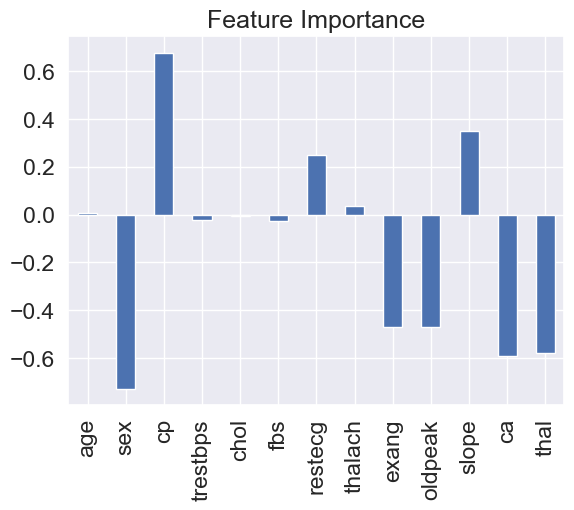

In [130]:
#visualize feature report
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_importance=feature_df.T.plot.bar(title="Feature Importance",legend=False);
plt.show(feature_importance)

In [131]:
pd.crosstab(df["sex"],df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [132]:
# cp=chest pain---> ([typical angina, atypical angina, non-anginal, asymptomatic])
pd.crosstab(df["cp"],df["target"])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


In [133]:
#slope=the slope of peak exercise ST(stress test) segment
#0=upsloping:better heart  rate with exercise
#1=flatsloping=minimal change(typical healthy heart)
#2=downsloping:signs of unhealthy heart
pd.crosstab(df["slope"],df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


In [134]:
##6.Experimentation
 #if you haven't hit your evaluation metric yet ....ask yourself..
#1.could you collect more data?
#2.could you try a better model? like CatBoost or XGBoost?
#3.could you improve the current models?(beyond what we'have done so far)
#4.start playing around and asking to fellow leaarners for suggestions and improvement.

In [135]:
#age (Age in years)
#sex : (1 = male, 0 = female)
#cp (Chest Pain Type): [ 0: asymptomatic, 1: atypical angina, 2: non-anginal pain, 3: typical angina]
#trestbps (Resting Blood Pressure in mm/hg )
#chol (Serum Cholesterol in mg/dl)
#fps (Fasting Blood Sugar > 120 mg/dl): [0 = no, 1 = yes]
#restecg (Resting ECG): [0: showing probable or definite left ventricular hypertrophy by Estes’ criteria, 1: normal, 2: having ST-T wave abnormality]
#thalach (maximum heart rate achieved)
#exang (Exercise Induced Angina): [1 = yes, 0 = no]
#oldpeak (ST depression induced by exercise relative to rest)
#slope (the slope of the peak exercise ST segment): [0: upsloping; 1: flat; 2: downsloping]
#ca [number of major vessels (0–3)
#thal : [1 = normal, 2 = fixed defect, 3 = reversible defect]
#target: [1 = disease, 0 = no disease]